# Vectorization

In [5]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Quick Recap: Images
As a quick reminder, we show you how to read in an image file, modify its pixel values. Since this is now a notebook, we no longer need to save the image to a file since the result will be shown inline.

(1000, 1600, 3)


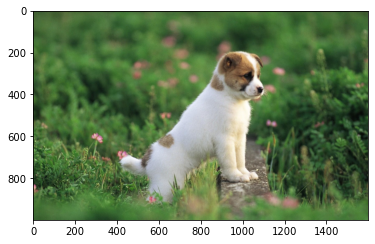

In [6]:
dog = imageio.imread('dog.jpg')
print(dog.shape)
plt.imshow(dog)

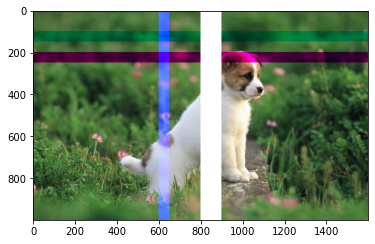

In [7]:
dog = imageio.imread('dog.jpg')

# Make a row of pixels without red
dog[100:150, :, 0] = 0
# Make a row of pixels without green
dog[200:250, :, 1] = 0

# Make a column of pixels with blue turned all the way up
dog[:, 600:650, 2] = 255

# Make a column of pixels with all channels turned all the way up (produces white)
dog[:, 800:900, :] = 255

plt.imshow(dog)

# Vectorization
Suppose we wanted to change this picture of a dog to put a spotlight on the dog. We want the output image to have a circle surrounding the middle and everything outside the circle made black to highlight how cute the dog is. 

To solve this problem, it really just involves setting some of the pixels in the image to black. The hard thing though, is it's not obvious how we dod this so we preserve a circle around the dog!

To accomplish this, we will think about the coordinate system for pixels in an image slightly differently. Let's think of the pixel as the origin `(0, 0)` and then trying to compute the distance from each pixel to this origin. You might remember from your math classes, that the distance from the origin of a point `(x, y)` is $\sqrt{x^2 + y^2}$. Since the actual pixels start with `(0, 0)` at the top-left, we have to recenter our locations by using the formula $\sqrt{(x-center_x)^2 + (y-center_y)^2}$. This is shown pictorially in the picture below where the pixels in gray are the ones we will black out.

![Pixel Locations](pixels.png)

The details of this formula aren't important, but the important thing is that we now have some way of computing a distance from the center of the image for each point. Now we can just pick some threshold to say all values further than that threshold should be converted to black! As a detail, we pick the smaller of the width or height dvidied by 2 so the circle is framed by the image.

In the cell below, we show two implementations of this algorihtm to set all the pixels far away from the center to black.